
# **LetsGrowMore Data Science Internship (VIP)**
**Preeti Sahani**

**Title: Develop A Neural Network That Can Read Handwriting**

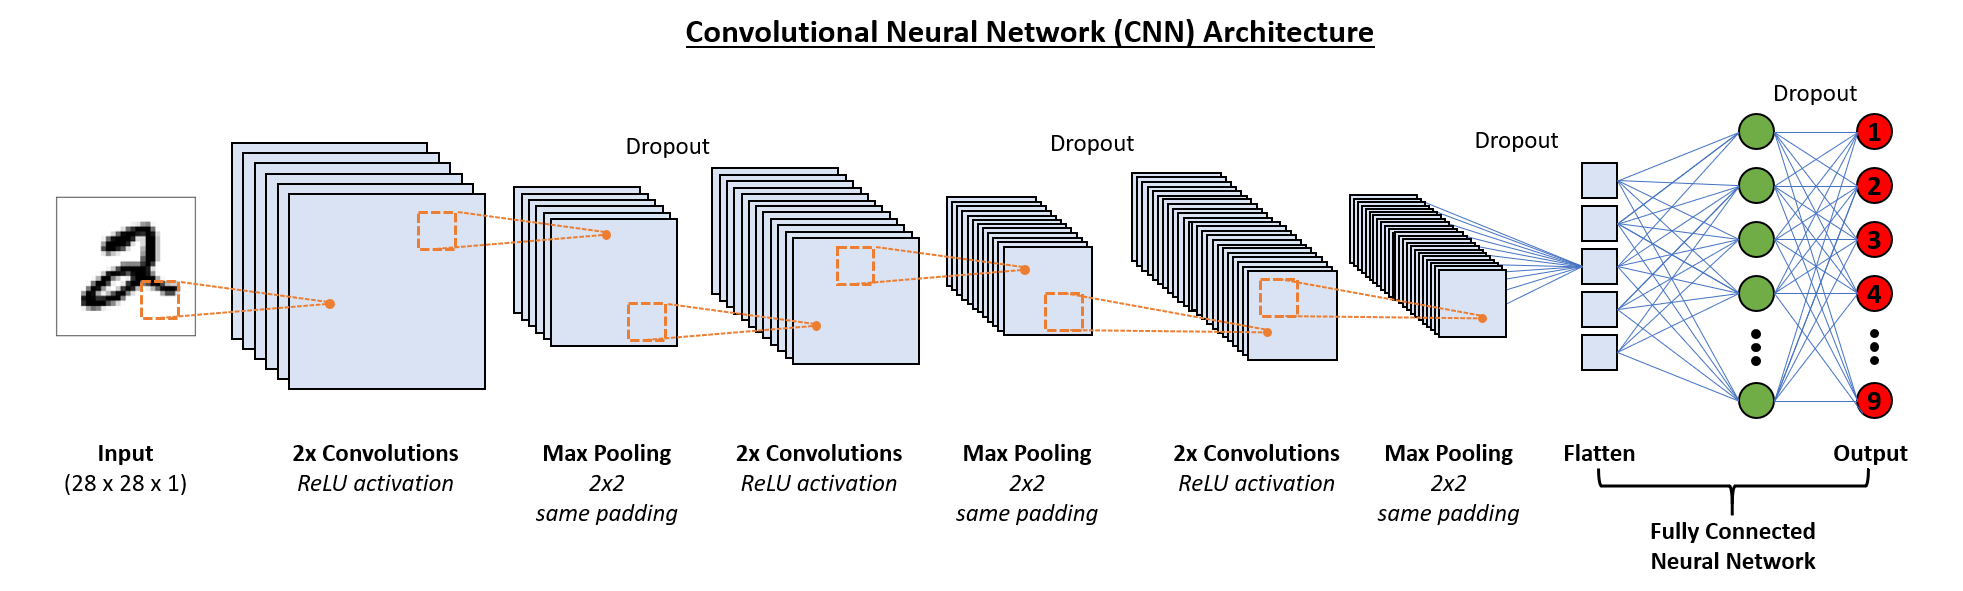!

Here,we will try to classify English Alphabets as shown above with the help of a powerful Convolutional Neural Network.

# Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

# Reading the Data

In [2]:
data = pd.read_csv("../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv")

In [3]:
data.head() 

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting the Data into Images and Labels

In [4]:
X = data.drop('0',axis = 1) # axis=1 for dropping column
y = data['0']

In [5]:
X.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y.head() 

0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: int64

# Splitting the Data into Train and Test Sets

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

# Reshaping the data into the format of Images

In [8]:
X_train = np.reshape(X_train.values, (X_train.shape[0], 28,28))
X_test = np.reshape(X_test.values, (X_test.shape[0], 28,28))

# Encoding English Alphabets to Number from 0-25

In [9]:
encode = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

# Getting to know about the Number of Alphabets present in the Data

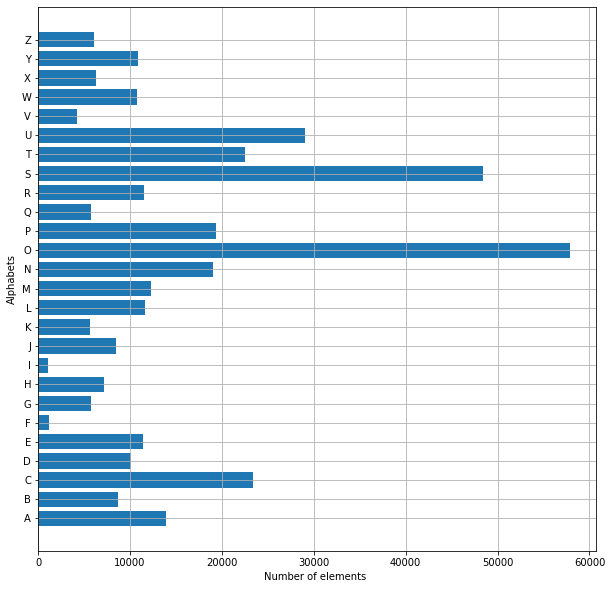

In [10]:
y_int = np.int0(y) 
count = np.zeros(26, dtype='int') 
for i in y_int:
    count[i] +=1 

alphabets = []
for i in encode.values():
    alphabets.append(i) 

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

# Making the data suitable for the CNN

In [11]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1) #RGB =>Channel of 1
print("New shape of train data: ", X_train.shape)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1) #RGB =>Channel of 1
print("New shape of train data: ", X_test.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


# Converting the Values to Categorical Variables

In [12]:
train_yOHE = to_categorical(Y_train, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(Y_test, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


# Creating the CNN

In [13]:
model = Sequential()
#CNN
# input -> conv -> maxpool -> conv -> maxpool ......->flattened vector-> 
#.                        hidden layer -> hidden layer -> softmax layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

# Getting Summary of the Model Created

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

# Compiling the Model

In [15]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Starting the Training

In [16]:
history = model.fit(X_train, train_yOHE, epochs=1,  validation_data = (X_test,test_yOHE))

9312/9312 [==============================] - 240s 26ms/step - loss: 0.4806 - accuracy: 0.8911 - val_loss: 0.0764 - val_accuracy: 0.9779


# Making Predictions

In [17]:
predictions = model.predict(
      x=X_test
    , batch_size=30
    , verbose=0
)

In [18]:
rounded_predictions = np.argmax(predictions, axis=-1)

# Creating Confusion Matrix

In [19]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
cm = confusion_matrix(y_true=Y_test, y_pred=rounded_predictions)

In [21]:
cm_plot_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Plotting the Confusion Matrix

Confusion matrix, without normalization
[[ 2608     2     0     4     0     0     0    19     0     1     1     3
      4     1     2     0     1     4     1     1     0     0     0     2
      0     0]
 [    4  1684     0    13     5     0    31     0     0     0     0     0
      0     0     6     0     3     5    16     0     0     0     0     0
      0     1]
 [    0     0  4596     0    34     0    13     0     0     0     0    25
      0     1     4     0     4     6     0     2     8     0     0     0
      0     0]
 [    2     1     0  1884     0     0     1     0     0    17     0     0
      0     0   128     2     1     0     1     0     3     0     0     0
      0     0]
 [    0     0     5     0  2250     1    17     0     0     1     1     3
      0     0     0     0     0     4     4     0     0     0     0     0
      0     1]
 [    0     0     1     0     8   201     0     0     0     0     0     0
      0     0     0     0     0     0     0     1     0     0     0    

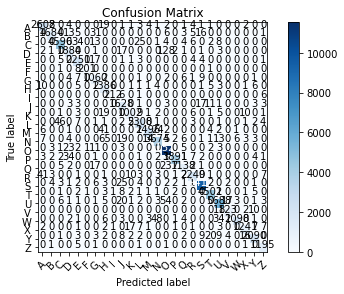

In [22]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

**SO, ACCORDING TO THE CONFUSION MATRIX, OUR MODEL WORKED PRETTY WELL ON THE TEST DATASET THAT WE CREATED TO TEST IT.**